# 빅데이터분석과제 5일차 랜덤포레스트

In [2]:
import os
from os import chdir
chdir('/home/pirl/test/bigdata/')
os.getcwd()

'/home/pirl/test/bigdata'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics

np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [5]:
##랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
## 데이터 분할 함수
from sklearn.model_selection import train_test_split
## 그리드서치
from sklearn.model_selection import GridSearchCV



In [6]:
## 데이터 불러오기
am=pd.read_csv("유방암.csv",engine='python',encoding='CP949')

In [7]:
am_y=am['diagnosis']
am_x=am.drop('diagnosis',axis=1,inplace=False)


In [8]:
## train set,test set 나눠줌
am_train_x,am_test_x,am_train_y,am_test_y=train_test_split(am_x,am_y,test_size=0.2,random_state=1234)

In [ ]:
### 랜덤포레스트 생성

In [30]:
parameters

{'criterion': ('gini', 'entropy'),
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 'min_samples_leaf': [31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

In [48]:
parameters={'criterion':('gini','entropy'),'min_samples_leaf':[10,15,20,25,30,35,40],
        'max_depth':[3,4,5,6,7,8,9,10],
            'n_estimators':[i+1 for i in range(3,10)]
        }

In [49]:
rf=RandomForestClassifier(random_state=1234)
gsearch=GridSearchCV(rf,parameters)
gsearch.fit(am_train_x,am_train_y)
model=gsearch.best_estimator_
model


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [50]:
score_train=model.score(am_train_x,am_train_y)
score_test=model.score(am_test_x,am_test_y)


In [57]:
## 변수중요도
feature_importance=pd.DataFrame()
feature_importance["feature"]=am_train_x.columns
feature_importance["importance"]=model.feature_importances_

feature_importance.sort_values(by="importance",ascending=False)


,feature,importance
22,worst perimeter,0.204855
27,worst concave points,0.163198
7,mean concave points,0.132853
6,mean concavity,0.106017
0,mean radius,0.080695
2,mean perimeter,0.066763
3,mean area,0.063760
5,mean compactness,0.040533
23,worst area,0.021436
20,worst radius,0.019678


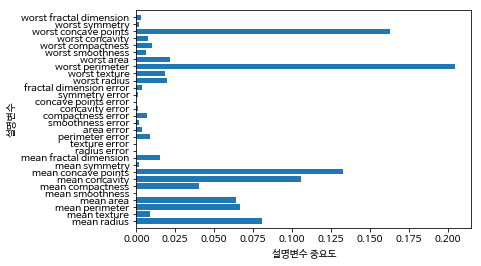

In [59]:
# 설명변수 중요도 그리는 함수 정의

def plot_feature_importances(model):
    n_features=am_train_x.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),am_train_x.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)

plot_feature_importances(model)